In [145]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.cm as cm
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

In [151]:
#Question 1a
insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

#Printing info of dataframe:
print(insurance_df.columns.values)
print(insurance_df.shape)

['ft1' 'ft2' 'ft3' 'ft4' 'ft5' 'ft6' 'charges']
(1338, 7)


In [152]:
insurance_df_encooded= pd.concat([insurance_df,pd.get_dummies(insurance_df['ft4'], prefix='ft4')],axis=1)
insurance_df_encooded= pd.concat([insurance_df_encooded,pd.get_dummies(insurance_df['ft5'], prefix='ft5')],axis=1)
insurance_df_encooded= pd.concat([insurance_df_encooded,pd.get_dummies(insurance_df['ft6'], prefix='ft6')],axis=1)
insurance_df_encooded.drop(['ft4','ft5','ft6'],axis=1, inplace=True)

print(insurance_df_encooded.columns.values)
print(insurance_df_encooded.shape)

print(insurance_df_encooded[0:2])

['ft1' 'ft2' 'ft3' 'charges' 'ft4_female' 'ft4_male' 'ft5_no' 'ft5_yes'
 'ft6_northeast' 'ft6_northwest' 'ft6_southeast' 'ft6_southwest']
(1338, 12)
   ft1    ft2  ft3     charges  ft4_female  ft4_male  ft5_no  ft5_yes  \
0   19  27.90    0  16884.9240           1         0       0        1   
1   18  33.77    1   1725.5523           0         1       1        0   

   ft6_northeast  ft6_northwest  ft6_southeast  ft6_southwest  
0              0              0              0              1  
1              0              0              1              0  


In [153]:
insurance_df_encooded.isnull().values.any()

False

In [154]:
X = insurance_df_encooded[['ft1' ,'ft2' ,'ft3' , 'ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values
y = insurance_df_encooded['charges'].values

In [155]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
print("model.score",model.score(X, y))
print("intercept_",model.intercept_ )
y_predcited = model.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

model.score 0.7509130345985208
intercept_ -666.9377199366427
error 6041.6796511744515


In [171]:

def get_rmse_folds(model_cv,X_val,y):
    kf = KFold(n_splits=10)
    rmse_train_all =[]
    rmse_test_all =[]
    rmse = []
    n = 0
    for train, test in kf.split(X_val,y):
        print("Split: ", n)
        n += 1
        model_cv.fit(X_val[train],y[train])
        y_pred_train = model_cv.predict(X_val[train])
        y_pred_test = model_cv.predict(X_val[test])
        #RMSE Error
        rmse_train = sqrt(mean_squared_error(y[train],y_pred_train))
        rmse_test = sqrt(mean_squared_error(y[test],y_pred_test))
        rmse_train_all.append(rmse_train)
        rmse_test_all.append(rmse_test)
        print()
        rmse.append([rmse_train, rmse_test])

    for i in range(10):
        print ('Fold ' , i, ' Train RMSE: ', rmse[i][0], ' Test RMSE: ', rmse[i][1])
    rmse = np.array(rmse)
    
    plt.plot([i for i in range(10)],rmse[:,0])
    plt.title("RMSE Train for 10 Folds")
    plt.xlabel("Fold")
    plt.ylabel("RMSE Train")
    plt.show()
    
    plt.plot([i for i in range(10)],rmse[:,1])
    plt.title("RMSE Test for 10 Folds")
    plt.xlabel("Fold")
    plt.ylabel("RMSE Test")
    plt.show()
    
    print("Average rmse for train data across all k folds= ",np.mean(rmse_train))
    print("Average rmse for test data across all k folds= ",np.mean(rmse_test))
    
    return rmse

In [172]:
def plot_graphs(model, X, y):
    model.fit(X,y)
    y_pred = model.predict(X)
    residuals = y - y_pred
    plt.scatter(y, y_pred, s = 0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True Values")
    plt.show()
    plt.scatter(y_pred, residuals, s = 0.5, color = 'green')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residues")
    plt.title("Residues vs Predicted Values")
    plt.show()

In [173]:
print(X.shape)
print(len(y))

(1338, 11)
1338


Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6051.3695241838495  Test RMSE:  5976.341526998486
Fold  1  Train RMSE:  6025.560377283273  Test RMSE:  6195.262808822173
Fold  2  Train RMSE:  6038.250869795185  Test RMSE:  6087.498376385134
Fold  3  Train RMSE:  6019.424200492137  Test RMSE:  6272.609595187519
Fold  4  Train RMSE:  6026.574940183817  Test RMSE:  6213.039051800158
Fold  5  Train RMSE:  6134.549933247374  Test RMSE:  5158.073086898697
Fold  6  Train RMSE:  6095.320776848486  Test RMSE:  5545.814968532659
Fold  7  Train RMSE:  5932.488996633746  Test RMSE:  6963.658229647404
Fold  8  Train RMSE:  6072.260130482568  Test RMSE:  5772.909049941434
Fold  9  Train RMSE:  5997.623956668823  Test RMSE:  6451.232130571958


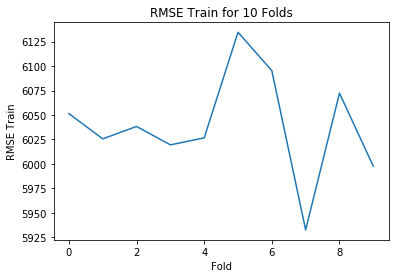

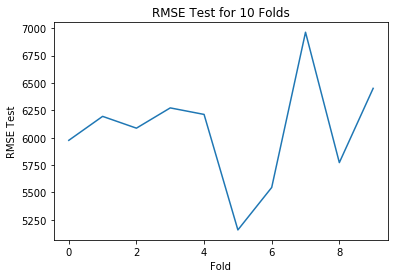

Average rmse for train data across all k folds=  5997.623956668823
Average rmse for test data across all k folds=  6451.232130571958


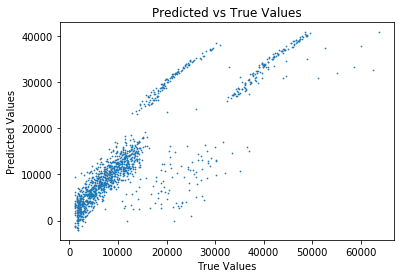

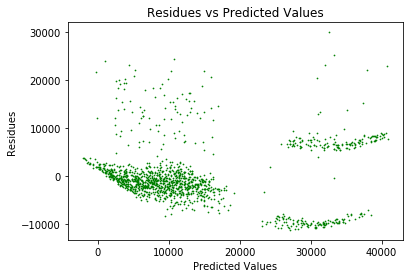

In [174]:
model = LinearRegression()

get_rmse_folds(model,X,y)
plot_graphs(model,X,y)


In [11]:
#Question 1b
x_numerical = insurance_df_encooded[['ft1' ,'ft2' ,'ft3']].values
x_categorical = insurance_df_encooded[['ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values
print(x_numerical[0][0])
print(x_categorical[0][0])

scaler = StandardScaler()
x_numerical_transformed = scaler.fit_transform(x_numerical)
X_new = np.hstack((x_numerical_transformed,x_categorical))
print(X_new[0][0])

19.0
1
-1.4387642602644821


20325.093306670686
0.7509130345985208
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6051.3695241838495  Test RMSE:  5976.341526998486
Fold  1  Train RMSE:  6025.560377283274  Test RMSE:  6195.262808822174
Fold  2  Train RMSE:  6038.250869795185  Test RMSE:  6087.498376385133
Fold  3  Train RMSE:  6019.424200492137  Test RMSE:  6272.609595187519
Fold  4  Train RMSE:  6026.574940183817  Test RMSE:  6213.039051800158
Fold  5  Train RMSE:  6134.549933247374  Test RMSE:  5158.073086898701
Fold  6  Train RMSE:  6095.320776848485  Test RMSE:  5545.81496853266
Fold  7  Train RMSE:  5932.488996633746  Test RMSE:  6963.658229647402
Fold  8  Train RMSE:  6072.260130482567  Test RMSE:  5772.909049941432
Fold  9  Train RMSE:  5997.623956668822  Test RMSE:  6451.232130571959


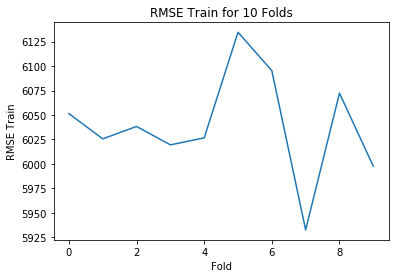

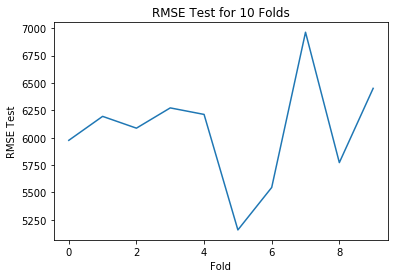

Average rmse for train data across all k folds=  5997.623956668822
Average rmse for test data across all k folds=  6451.232130571959


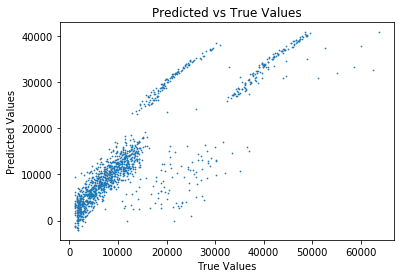

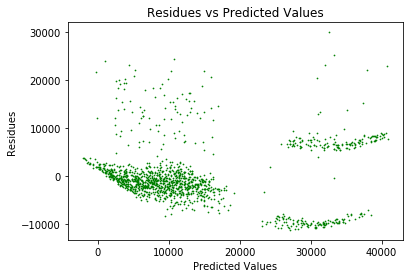

error 6041.6796511744515


In [12]:
model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

In [13]:
#Question 1c
x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_numerical = insurance_df_encooded[['ft2' ,'ft3']].values
x_categorical = insurance_df_encooded[['ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values


x_ft1_new = np.array(x_ft1_new).reshape(len(x_ft1_new),1)
print(x_ft1_new.shape)
print(x_numerical.shape)
scaler = StandardScaler()
x_numerical_transformed = scaler.fit_transform(x_numerical)
x_numerical_new = np.hstack((x_ft1_new,x_numerical_transformed))
print(x_numerical_new.shape)
X_new = np.hstack((x_numerical_new,x_categorical))
print(X_new[0][0])        

(1338, 1)
(1338, 2)
(1338, 3)
1.0


11753.367823607958
0.7376725787155891
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6218.897752834433  Test RMSE:  6051.384757511031
Fold  1  Train RMSE:  6184.2752726955205  Test RMSE:  6352.292413446175
Fold  2  Train RMSE:  6177.846079737399  Test RMSE:  6417.106727227786
Fold  3  Train RMSE:  6167.937668115899  Test RMSE:  6514.3908259225445
Fold  4  Train RMSE:  6202.875056032284  Test RMSE:  6213.293324441344
Fold  5  Train RMSE:  6285.9887757629685  Test RMSE:  5390.965302787943
Fold  6  Train RMSE:  6250.3377392278035  Test RMSE:  5739.512716296268
Fold  7  Train RMSE:  6085.838920948148  Test RMSE:  7164.010402838773
Fold  8  Train RMSE:  6242.548668025446  Test RMSE:  5815.526771378088
Fold  9  Train RMSE:  6161.972899673732  Test RMSE:  6559.8331919120155


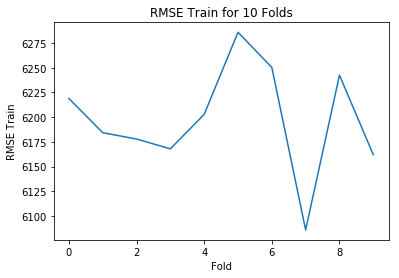

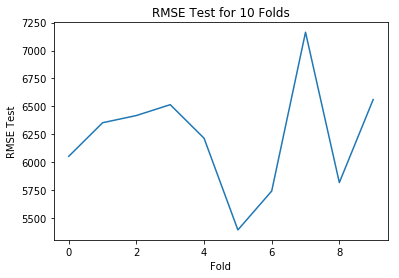

Average rmse for train data across all k folds=  6161.972899673732
Average rmse for test data across all k folds=  6559.8331919120155


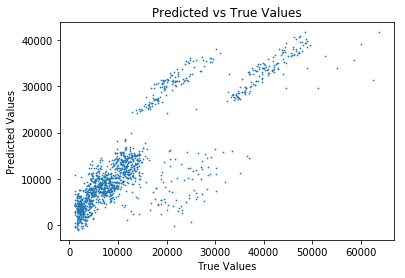

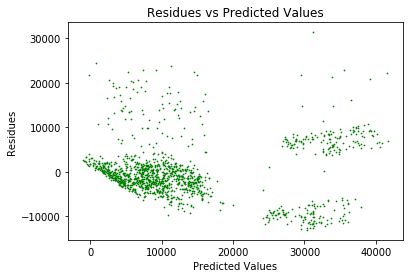

error 6200.176291214307


In [14]:
model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

In [15]:
#Question 2a

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))
print(X_all_numeric.shape)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
(1338, 6)


C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
f_test, _ = f_regression(X_all_numeric, y)

In [17]:
print(np.sort(f_test))
sorted_indices = np.argsort(f_test)[::-1]
print(sorted_indices)
print("Best features based on f_test is = {} and {}".format(sorted_indices[0],sorted_indices[1]))

[5.14943381e-02 4.39970170e+00 6.20603705e+00 5.47093081e+01
 1.31174013e+02 2.17761487e+03]
[4 0 1 2 3 5]
Best features based on f_test is = 4 and 0


In [18]:
mi = mutual_info_regression(X_all_numeric, y)
print(np.sort(mi))
sorted_indices = np.argsort(mi)[::-1]
print(sorted_indices)
print("Best features based on mi is = {} and {}".format(sorted_indices[0],sorted_indices[1]))

[0.0735041  0.07603637 0.16155015 0.17665987 0.36917105 1.49591731]
[0 4 3 2 5 1]
Best features based on mi is = 0 and 4


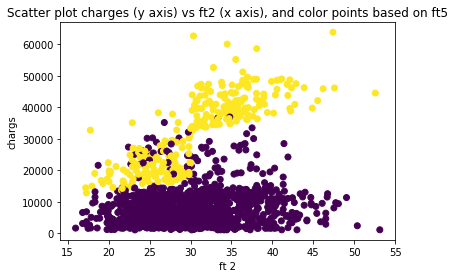

In [24]:
#Question 2b
plt.scatter(X_all_numeric[:, 1], y,c=X_all_numeric[:, 4])
plt.xlabel("ft 2")
plt.ylabel("chargs")
plt.title("Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5")
plt.show()

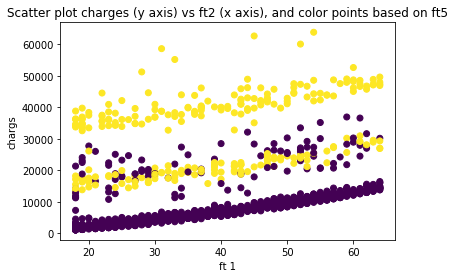

In [25]:
#Question 2c
plt.scatter(X_all_numeric[:, 0], y,c=X_all_numeric[:, 4])
plt.xlabel("ft 1")
plt.ylabel("chargs")
plt.title("Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5")
plt.show()

In [25]:
def get_rmse_folds_logy(model_cv,X_val,log_y, y):
    kf = KFold(n_splits=10)
    rmse_train_all =[]
    rmse_test_all =[]
    rmse = []
    n = 0
    for train, test in kf.split(X_val,log_y):
        print("Split: ", n)
        n += 1
        model_cv.fit(X_val[train],log_y[train])
        y_pred_train = model_cv.predict(X_val[train])
        y_pred_test = model_cv.predict(X_val[test])
        #RMSE Error
        rmse_train = sqrt(mean_squared_error(y[train],np.exp(y_pred_train)))
        rmse_test = sqrt(mean_squared_error(y[test],np.exp(y_pred_test)))
        rmse_train_all.append(rmse_train)
        rmse_test_all.append(rmse_test)
        print()
        rmse.append([rmse_train, rmse_test])

    for i in range(10):
        print ('Fold ' , i, ' Train RMSE: ', rmse[i][0], ' Test RMSE: ', rmse[i][1])
    rmse = np.array(rmse)
    
    plt.plot([i for i in range(10)],rmse[:,0])
    plt.title("RMSE Train for 10 Folds")
    plt.xlabel("Fold")
    plt.ylabel("RMSE Train")
    plt.show()
    
    plt.plot([i for i in range(10)],rmse[:,1])
    plt.title("RMSE Test for 10 Folds")
    plt.xlabel("Fold")
    plt.ylabel("RMSE Test")
    plt.show()
    
    print("Average rmse for train data across all k folds= ",np.mean(rmse_train))
    print("Average rmse for test data across all k folds= ",np.mean(rmse_test))
    
    return rmse

In [26]:
def plot_graphs_logy(model, X,log_y, y):
    model.fit(X,log_y)
    y_pred = model.predict(X)
    residuals = y - np.exp(y_pred)
    plt.scatter(y, np.exp(y_pred), s = 0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True Values")
    plt.show()
    plt.scatter(np.exp(y_pred), residuals, s = 0.5, color = 'green')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residues")
    plt.title("Residues vs Predicted Values")
    plt.show()

8363.967450435839
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  8137.422270696502  Test RMSE:  10213.482559804483
Fold  1  Train RMSE:  8298.558296807203  Test RMSE:  8598.787570193812
Fold  2  Train RMSE:  8424.470733682932  Test RMSE:  9068.201618554234
Fold  3  Train RMSE:  8452.337686773664  Test RMSE:  8685.607133587888
Fold  4  Train RMSE:  8349.231544097145  Test RMSE:  7770.65016268759
Fold  5  Train RMSE:  8385.94593104192  Test RMSE:  6141.67763370969
Fold  6  Train RMSE:  8386.211666577194  Test RMSE:  8005.125696797076
Fold  7  Train RMSE:  8451.011489082735  Test RMSE:  7836.45601806152
Fold  8  Train RMSE:  8457.39511080817  Test RMSE:  8105.415688722082
Fold  9  Train RMSE:  8246.824816168142  Test RMSE:  9312.553183602087


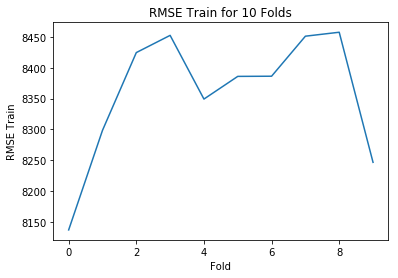

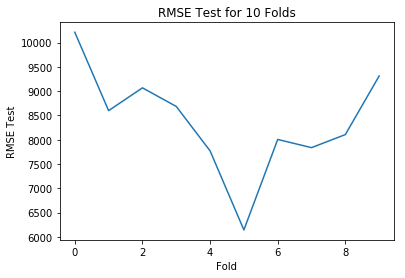

Average rmse for train data across all k folds=  8246.824816168142
Average rmse for test data across all k folds=  9312.553183602087


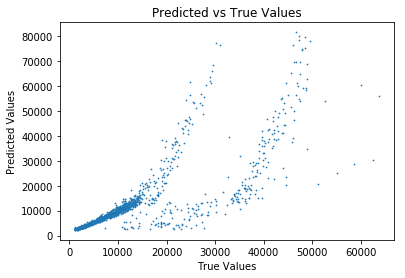

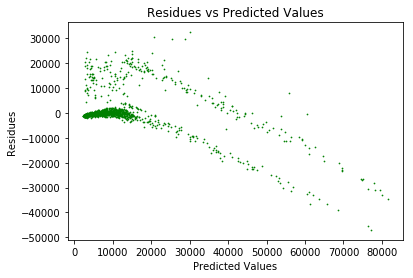

In [27]:
#Question 3a
#Using Feature Encoding (1a)
from sklearn.metrics import mean_squared_error
log_y = np.log(y)
insurance_df_encooded= pd.concat([insurance_df,pd.get_dummies(insurance_df['ft4'], prefix='ft4')],axis=1)
insurance_df_encooded= pd.concat([insurance_df_encooded,pd.get_dummies(insurance_df['ft5'], prefix='ft5')],axis=1)
insurance_df_encooded= pd.concat([insurance_df_encooded,pd.get_dummies(insurance_df['ft6'], prefix='ft6')],axis=1)
insurance_df_encooded.drop(['ft4','ft5','ft6'],axis=1, inplace=True)
X = insurance_df_encooded[['ft1' ,'ft2' ,'ft3' , 'ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values

model = LinearRegression()
model.fit(X,log_y)

log_y_predcited = model.predict(X)
exp_log_y_predcited = np.exp(log_y_predcited)

error = np.sqrt(np.sum((exp_log_y_predcited - y)**2)/y.shape[0])
error = sqrt(mean_squared_error(y,exp_log_y_predcited ))
print(error)

model = LinearRegression()
get_rmse_folds_logy(model,X,log_y,y)
plot_graphs_logy(model,X,log_y,y)


In [29]:
#Question 3b

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))
print(X_all_numeric.shape)

f_test, _ = f_regression(X_all_numeric, log_y)
print(np.sort(f_test))
sorted_indices = np.argsort(f_test)[::-1]
print(sorted_indices)
print("Best features based on f_test is = {} and {}".format(sorted_indices[0],sorted_indices[1]))

mi = mutual_info_regression(X_all_numeric, log_y)
print(np.sort(mi))
sorted_indices = np.argsort(mi)[::-1]
print(sorted_indices)
print("Best features based on mi is = {} and {}".format(sorted_indices[0],sorted_indices[1]))

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
(1338, 6)
[4.23764137e-02 2.43916473e+00 2.39364692e+01 3.57046705e+01
 5.15977081e+02 1.06212392e+03]
[4 0 2 1 5 3]
Best features based on f_test is = 4 and 0
[0.06640156 0.07753486 0.16101784 0.17628529 0.36939335 1.5020993 ]
[0 4 3 2 5 1]
Best features based on mi is = 0 and 4


C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


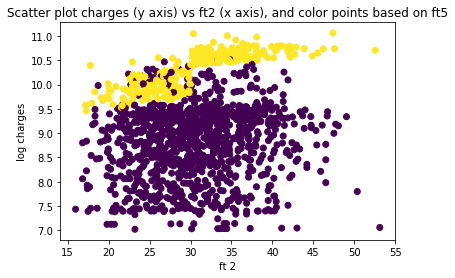

In [28]:
plt.scatter(X_all_numeric[:, 1], log_y,c=X_all_numeric[:, 4])
plt.xlabel("ft 2")
plt.ylabel("log charges")
plt.title("Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5")
plt.show()

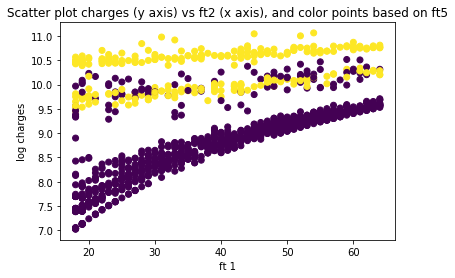

In [29]:
plt.scatter(X_all_numeric[:, 0], log_y,c=X_all_numeric[:, 4])
plt.xlabel("ft 1")
plt.ylabel("log charges")
plt.title("Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5")
plt.show()

O/p features =  232
I/p features =  11
60498376344184.42
0.8469122274362438
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  4733.595460324655  Test RMSE:  5076.694417080853
Fold  1  Train RMSE:  4697.942420661812  Test RMSE:  4839.26345449524
Fold  2  Train RMSE:  4672.179609425972  Test RMSE:  5051.585848107443
Fold  3  Train RMSE:  4627.694511766759  Test RMSE:  5425.975440166979
Fold  4  Train RMSE:  4695.835027255153  Test RMSE:  4851.563492484749
Fold  5  Train RMSE:  4806.62663198934  Test RMSE:  3652.897537706243
Fold  6  Train RMSE:  4698.192323737501  Test RMSE:  4831.205670829681
Fold  7  Train RMSE:  4585.137699116969  Test RMSE:  5732.812495571622
Fold  8  Train RMSE:  4709.354841538645  Test RMSE:  4766.180307649634
Fold  9  Train RMSE:  4604.052692388772  Test RMSE:  5693.691359734549


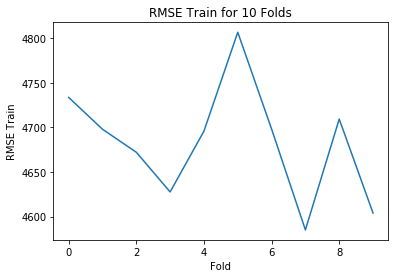

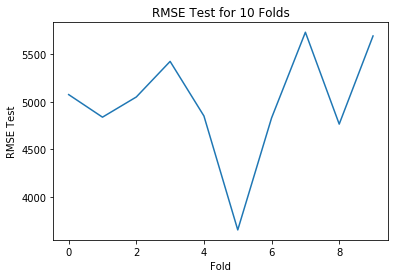

Average rmse for train data across all k folds=  4604.052692388772
Average rmse for test data across all k folds=  5693.691359734549


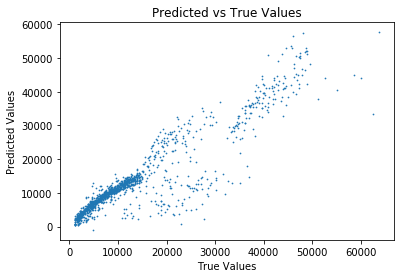

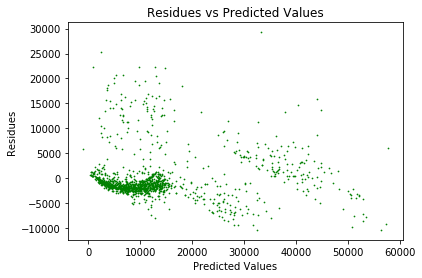

error 4736.444416207997


In [30]:
#Q4-a
#Polynomial feautres
from sklearn.preprocessing import PolynomialFeatures
insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")
X = insurance_df_encooded[['ft1' ,'ft2' ,'ft3' , 'ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values
y = insurance_df_encooded['charges'].values

poly = PolynomialFeatures(3,interaction_only =True)
X_new=poly.fit_transform(X)
print("O/p features = ",poly.n_output_features_)
print("I/p features = ",poly.n_input_features_)

model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

[0 1 1 ... 0 0 0]
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
(1338, 6)
13270.422265141258
0.7507372027994939
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6051.836195430858  Test RMSE:  5987.131971960008
Fold  1  Train RMSE:  6027.409106070731  Test RMSE:  6199.421958352679
Fold  2  Train RMSE:  6040.56057031375  Test RMSE:  6087.570935367302
Fold  3  Train RMSE:  6024.910435663958  Test RMSE:  6238.375951059564
Fold  4  Train RMSE:  6028.801125611409  Test RMSE:  6214.143029423804
Fold  5  Train RMSE:  6136.0923380464355  Test RMSE:  5163.278145850109
Fold  6  Train RMSE:  6097.6330576536975  Test RMSE:  5545.332746686984
Fold  7  Train RMSE:  5936.973749901483  Test RMSE:  6944.147363285604
Fold  8  Train RMSE:  6074.120480594432  Test RMSE:  5775.846840465371
Fold  9  Train RMSE:  5999.0252339250455  Test RMSE:  6458.520367383605


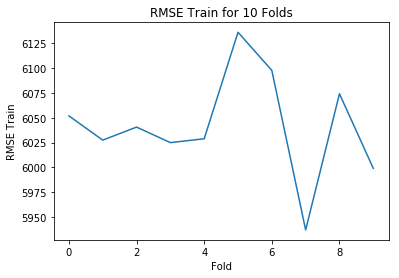

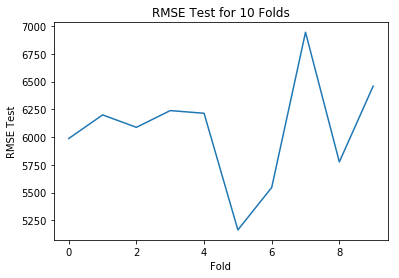

Average rmse for train data across all k folds=  5999.0252339250455
Average rmse for test data across all k folds=  6458.520367383605


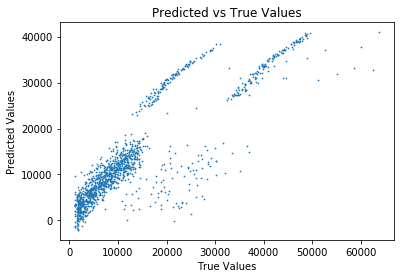

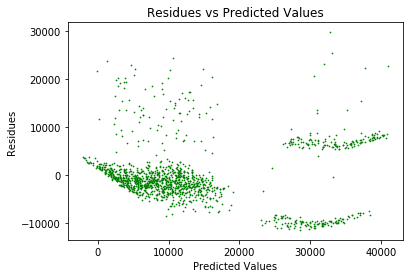

error 6043.8117017063305


In [142]:
#Different combination of encoding methods
#Convert each categorical feature into a one dimensional numerical value and then standardise across all features;

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(x_ft4_numeric)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))
print(X_all_numeric.shape)

scaler = StandardScaler()
X_new = scaler.fit_transform(X_all_numeric) 

model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

15.96
53.13
30.66339686098655


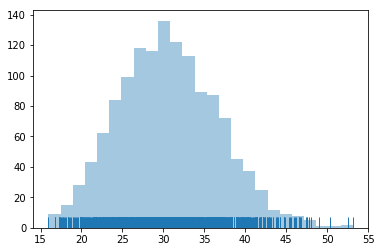

In [35]:
#visualising ft2 to divide into ranges
import seaborn as sns

X_ft2 = insurance_df_encooded[['ft2']].values
print(np.min(X_ft2))
print(np.max(X_ft2))
print(np.mean(X_ft2))

sns.distplot(X_ft2, kde=False, rug=True)

0
5
1.0949177877429
[0 1 2 3 4 5]


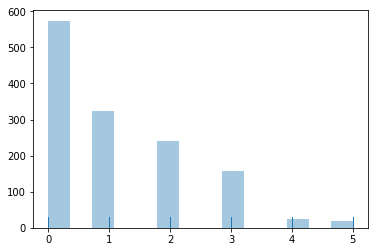

In [37]:
#visualising ft3 to divide into ranges
import seaborn as sns

X_ft2 = insurance_df_encooded[['ft3']].values
print(np.min(X_ft2))
print(np.max(X_ft2))
print(np.mean(X_ft2))
print(np.unique(X_ft2))
sns.distplot(X_ft2, kde=False, rug=True)

20301.71346761395
0.7319843317253608
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6289.377035901947  Test RMSE:  6085.730823656337
Fold  1  Train RMSE:  6245.837296186491  Test RMSE:  6467.089475593904
Fold  2  Train RMSE:  6258.3110787196565  Test RMSE:  6362.993963445008
Fold  3  Train RMSE:  6239.328876634932  Test RMSE:  6542.011353715206
Fold  4  Train RMSE:  6266.4509201300625  Test RMSE:  6311.587214722371
Fold  5  Train RMSE:  6353.946149648341  Test RMSE:  5446.613055150185
Fold  6  Train RMSE:  6321.046407715124  Test RMSE:  5767.40096435275
Fold  7  Train RMSE:  6154.119392939179  Test RMSE:  7218.097606300805
Fold  8  Train RMSE:  6298.618441664706  Test RMSE:  5989.753377705358
Fold  9  Train RMSE:  6220.026299062756  Test RMSE:  6701.817741423759


C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


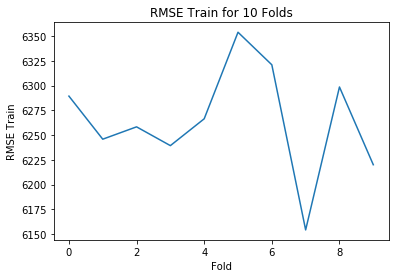

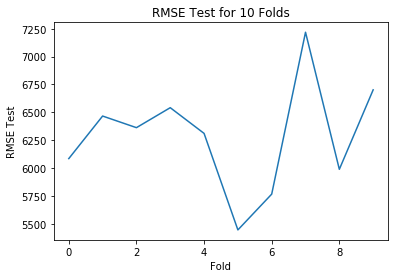

Average rmse for train data across all k folds=  6220.026299062756
Average rmse for test data across all k folds=  6701.817741423759


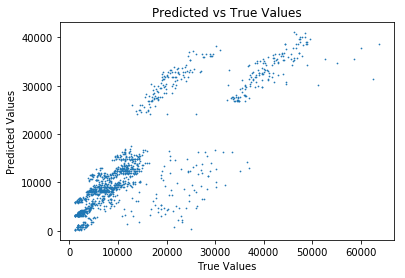

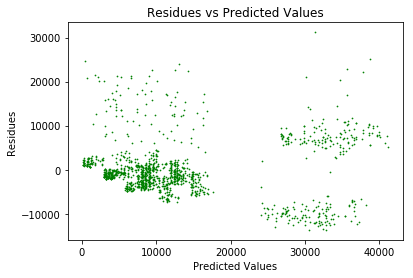

error 6267.037377627698


In [40]:
#Divide ft1 into 3 ranges: < 30, [30,50] and > 50
#Divide ft2 into 3 ranges:  < 25, [25,35] and > 35
#standradize across ft1,ft2,ft3 
#one hot encode the catrgorical ones 

x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_ft2 = insurance_df_encooded[['ft2']].values
x_ft2_new = []
for x_value in x_ft2:
    if(x_value<25):
        x_ft2_new.append(1)
    elif(x_value>=25 and x_value<=35 ):
        x_ft2_new.append(2)
    elif( x_value>35 ):
        x_ft2_new.append(3)
        
x_ft3 = insurance_df_encooded[['ft3']].values
x_categorical = insurance_df_encooded[['ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values


x_ft1_new = np.array(x_ft1_new).reshape(len(x_ft1_new),1)
x_ft2_new = np.array(x_ft2_new).reshape(len(x_ft2_new),1)
x_numerical_new = np.hstack((x_ft1_new,x_ft2_new))
x_numerical_new = np.hstack((x_numerical_new,x_ft3))

scaler = StandardScaler()
x_numerical_transformed = scaler.fit_transform(x_numerical_new)
X_new = np.hstack((x_numerical_transformed,x_categorical))

model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
(1338, 6)
13270.422265141258
0.7507372027994939
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6051.836195430858  Test RMSE:  5987.131971960008
Fold  1  Train RMSE:  6027.409106070731  Test RMSE:  6199.421958352679
Fold  2  Train RMSE:  6040.56057031375  Test RMSE:  6087.570935367302
Fold  3  Train RMSE:  6024.910435663958  Test RMSE:  6238.375951059564
Fold  4  Train RMSE:  6028.801125611409  Test RMSE:  6214.143029423804
Fold  5  Train RMSE:  6136.0923380464355  Test RMSE:  5163.278145850109
Fold  6  Train RMSE:  6097.6330576536975  Test RMSE:  5545.332746686984
Fold  7  Train RMSE:  5936.973749901483  Test RMSE:  6944.147363285604
Fold  8  Train RMSE:  6074.120480594432  Test RMSE:  5775.846840465371
Fold  9  Train RMSE:  5999.0252339250455  Test RMSE:  6458.520367383605


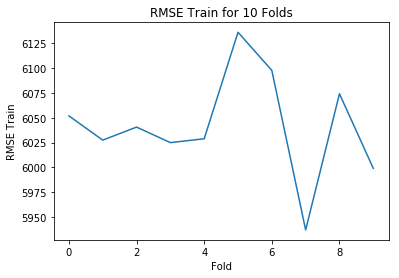

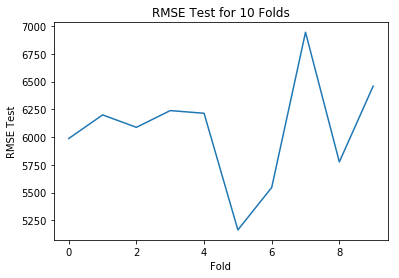

Average rmse for train data across all k folds=  5999.0252339250455
Average rmse for test data across all k folds=  6458.520367383605


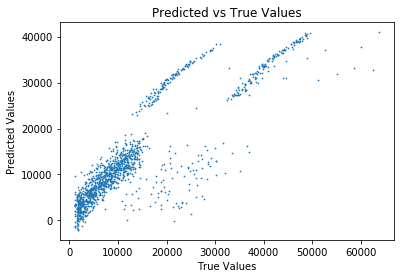

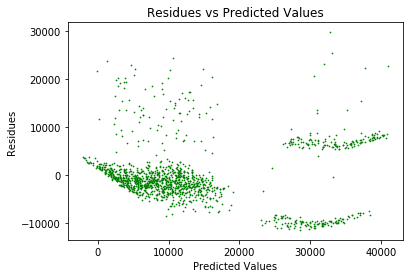

error 6043.8117017063305


In [114]:
#Divide ft1 into 3 ranges: < 30, [30,50] and > 50
#Divide ft2 into 3 ranges:  < 25, [25,35] and > 35
#convert the catrgorical features to numerical features 
#standradize across all features now


x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_ft2 = insurance_df_encooded[['ft2']].values
x_ft2_new = []
for x_value in x_ft2:
    if(x_value<25):
        x_ft2_new.append(1)
    elif(x_value>=25 and x_value<=35 ):
        x_ft2_new.append(2)
    elif( x_value>35 ):
        x_ft2_new.append(3)
        
x_ft3 = insurance_df_encooded[['ft3']].values

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))

scaler = StandardScaler()

X_new = scaler.fit_transform(X_all_numeric)

model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

In [103]:
!pip install category_encoders

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
(1338, 6)
13270.422265141258
0.7507372027994939
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6051.836195430858  Test RMSE:  5987.131971960008
Fold  1  Train RMSE:  6027.409106070731  Test RMSE:  6199.421958352679
Fold  2  Train RMSE:  6040.56057031375  Test RMSE:  6087.570935367302
Fold  3  Train RMSE:  6024.910435663958  Test RMSE:  6238.375951059564
Fold  4  Train RMSE:  6028.801125611409  Test RMSE:  6214.143029423804
Fold  5  Train RMSE:  6136.0923380464355  Test RMSE:  5163.278145850109
Fold  6  Train RMSE:  6097.6330576536975  Test RMSE:  5545.332746686984
Fold  7  Train RMSE:  5936.973749901483  Test RMSE:  6944.147363285604
Fold  8  Train RMSE:  6074.120480594432  Test RMSE:  5775.846840465371
Fold  9  Train RMSE:  5999.0252339250455  Test RMSE:  6458.520367383605


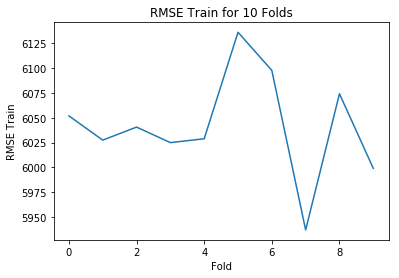

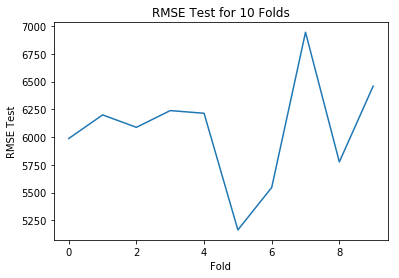

Average rmse for train data across all k folds=  5999.0252339250455
Average rmse for test data across all k folds=  6458.520367383605


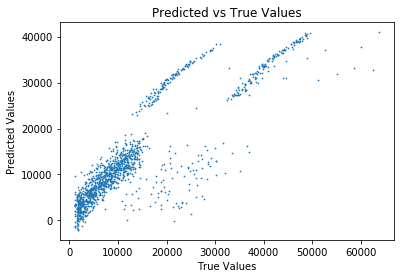

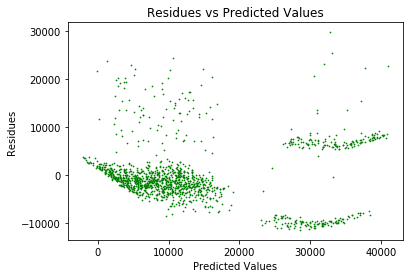

error 6043.8117017063305


In [114]:
#Divide ft1 into 3 ranges: < 30, [30,50] and > 50
#Divide ft2 into 3 ranges:  < 25, [25,35] and > 35
#convert the catrgorical features to numerical features 
#standradize across all features now


x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_ft2 = insurance_df_encooded[['ft2']].values
x_ft2_new = []
for x_value in x_ft2:
    if(x_value<25):
        x_ft2_new.append(1)
    elif(x_value>=25 and x_value<=35 ):
        x_ft2_new.append(2)
    elif( x_value>35 ):
        x_ft2_new.append(3)
        
x_ft3 = insurance_df_encooded[['ft3']].values

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))

scaler = StandardScaler()

X_new = scaler.fit_transform(X_all_numeric)

model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
(1338, 6)
13270.422265141258
0.7507372027994939
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6051.836195430858  Test RMSE:  5987.131971960008
Fold  1  Train RMSE:  6027.409106070731  Test RMSE:  6199.421958352679
Fold  2  Train RMSE:  6040.56057031375  Test RMSE:  6087.570935367302
Fold  3  Train RMSE:  6024.910435663958  Test RMSE:  6238.375951059564
Fold  4  Train RMSE:  6028.801125611409  Test RMSE:  6214.143029423804
Fold  5  Train RMSE:  6136.0923380464355  Test RMSE:  5163.278145850109
Fold  6  Train RMSE:  6097.6330576536975  Test RMSE:  5545.332746686984
Fold  7  Train RMSE:  5936.973749901483  Test RMSE:  6944.147363285604
Fold  8  Train RMSE:  6074.120480594432  Test RMSE:  5775.846840465371
Fold  9  Train RMSE:  5999.0252339250455  Test RMSE:  6458.520367383605


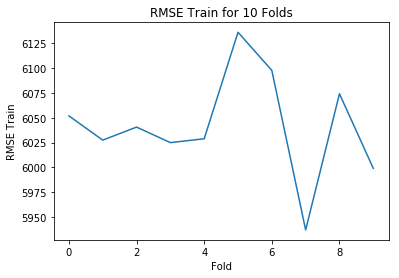

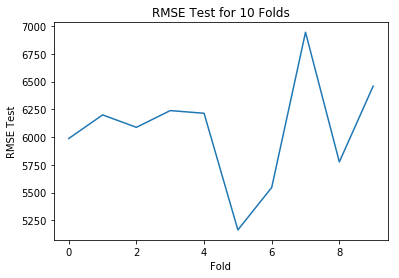

Average rmse for train data across all k folds=  5999.0252339250455
Average rmse for test data across all k folds=  6458.520367383605


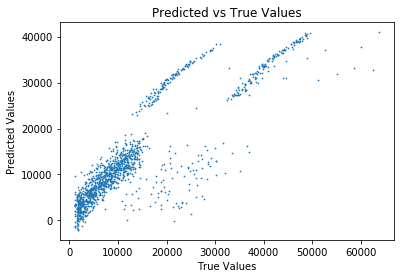

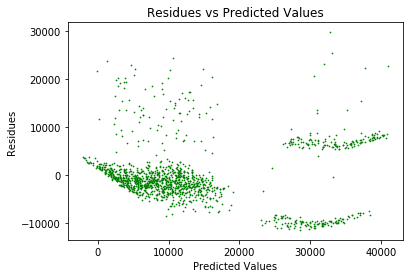

error 6043.8117017063305


In [114]:
#Divide ft1 into 3 ranges: < 30, [30,50] and > 50
#Divide ft2 into 3 ranges:  < 25, [25,35] and > 35
#convert the catrgorical features to numerical features 
#standradize across all features now


x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_ft2 = insurance_df_encooded[['ft2']].values
x_ft2_new = []
for x_value in x_ft2:
    if(x_value<25):
        x_ft2_new.append(1)
    elif(x_value>=25 and x_value<=35 ):
        x_ft2_new.append(2)
    elif( x_value>35 ):
        x_ft2_new.append(3)
        
x_ft3 = insurance_df_encooded[['ft3']].values

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))

scaler = StandardScaler()

X_new = scaler.fit_transform(X_all_numeric)

model = LinearRegression()
model.fit(X_new,y)
print(model.intercept_)
print(model.score(X_new, y))
model = LinearRegression()
get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

----
(1338, 3)
(1338, 7)
(1338, 10)
Split:  0

Split:  1

Split:  2

Split:  3

Split:  4

Split:  5

Split:  6

Split:  7

Split:  8

Split:  9

Fold  0  Train RMSE:  6289.377035901947  Test RMSE:  6085.730823656339
Fold  1  Train RMSE:  6245.837296186491  Test RMSE:  6467.089475593901
Fold  2  Train RMSE:  6258.3110787196565  Test RMSE:  6362.993963445011
Fold  3  Train RMSE:  6239.328876634932  Test RMSE:  6542.011353715205
Fold  4  Train RMSE:  6266.4509201300625  Test RMSE:  6311.587214722363
Fold  5  Train RMSE:  6353.946149648341  Test RMSE:  5446.613055150178
Fold  6  Train RMSE:  6321.046407715124  Test RMSE:  5767.400964352748
Fold  7  Train RMSE:  6154.119392939179  Test RMSE:  7218.097606300805
Fold  8  Train RMSE:  6298.618441664707  Test RMSE:  5989.7533777053595
Fold  9  Train RMSE:  6220.026299062756  Test RMSE:  6701.817741423757


C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


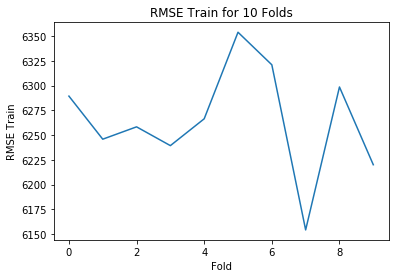

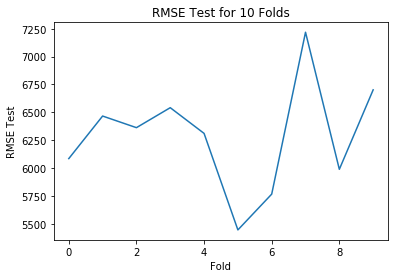

Average rmse for train data across all k folds=  6220.026299062756
Average rmse for test data across all k folds=  6701.817741423757


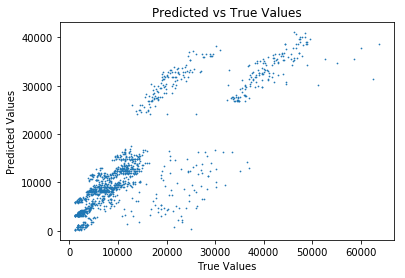

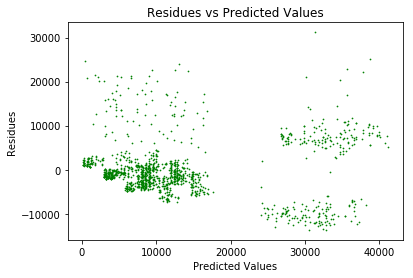

error 6267.037377627697


In [200]:
import category_encoders as ce
#Binary encode ft4,ft5,ft6
#Divide ft1 into 3 ranges: < 30, [30,50] and > 50
#Divide ft2 into 3 ranges:  < 25, [25,35] and > 35
#keep ft 3 as is 

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

encoder = ce.BinaryEncoder(cols=['ft4'])
x = encoder.fit_transform(insurance_df)

encoder = ce.BinaryEncoder(cols=['ft5'])
x = encoder.fit_transform(x)

encoder = ce.BinaryEncoder(cols=['ft6'])
x = encoder.fit_transform(x)


x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_ft2 = insurance_df_encooded[['ft2']].values

x_ft2_new = []
for x_value in x_ft2:
    if(x_value<25):
        x_ft2_new.append(1)
    elif(x_value>=25 and x_value<=35 ):
        x_ft2_new.append(2)
    elif( x_value>35 ):
        x_ft2_new.append(3)
        
x_ft1_new = np.array(x_ft1_new).reshape(len(x_ft1_new),1)
x_ft2_new = np.array(x_ft2_new).reshape(len(x_ft2_new),1)
        
x_ft3 = insurance_df_encooded[['ft3']].values


x_ft4f5f6 = x[['ft6_0',  'ft6_1',  'ft6_2',  'ft5_0',  'ft5_1',  'ft4_0',  'ft4_1']].values

X_all_numeric = np.hstack ((x_ft1_new,x_ft2_new))
X_all_numeric = np.hstack ((X_all_numeric,x_ft3))

scaler = StandardScaler()

X_new = scaler.fit_transform(X_all_numeric)
print("----")
print(X_all_numeric.shape)
print(x_ft4f5f6.shape)
X_new = np.hstack ((X_new,x_ft4f5f6))
print(X_new.shape)
y = insurance_df_encooded['charges'].values

model = LinearRegression()
model.fit(X_new,y)

get_rmse_folds(model,X_new,y)
plot_graphs(model,X_new,y)

y_predcited = model.predict(X_new)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

Split:  0
Split:  1
Split:  2
Split:  3
Split:  4
Split:  5
Split:  6
Split:  7
Split:  8
Split:  9
Average Train RMSE:  4261.5264209466595 
Average Test RMSE:  4558.783473163517
Out of Bag Error:  0.14333852748332565


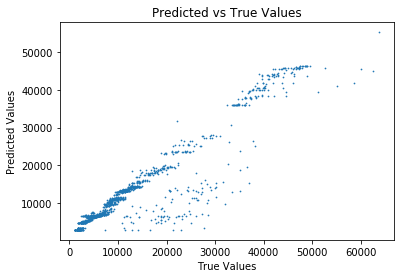

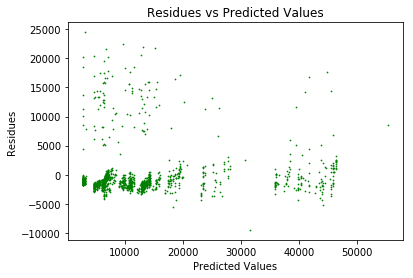

In [5]:
#Q4-b

#Random forest
insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")
insurance_df_encooded= pd.concat([insurance_df,pd.get_dummies(insurance_df['ft4'], prefix='ft4')],axis=1)
insurance_df_encooded= pd.concat([insurance_df_encooded,pd.get_dummies(insurance_df['ft5'], prefix='ft5')],axis=1)
insurance_df_encooded= pd.concat([insurance_df_encooded,pd.get_dummies(insurance_df['ft6'], prefix='ft6')],axis=1)
insurance_df_encooded.drop(['ft4','ft5','ft6'],axis=1, inplace=True)
X = insurance_df_encooded[['ft1' ,'ft2' ,'ft3' , 'ft4_female' ,'ft4_male' ,'ft5_no' ,'ft5_yes'
 ,'ft6_northeast' ,'ft6_northwest' ,'ft6_southeast' ,'ft6_southwest']].values
y = insurance_df_encooded['charges'].values

kf = KFold(n_splits=10)

train_rmse = 0.0
test_rmse = 0.0
n = 0

model_cv = RandomForestRegressor(max_depth=4, bootstrap=True, random_state=0,n_estimators=20, oob_score=True, max_features='auto')

for train, test in kf.split(X,y):
    print("Split: ", n)
    n += 1
    model_cv.fit(X[train],y[train])
    y_pred_train = model_cv.predict(X[train])
    y_pred_test = model_cv.predict(X[test])
    #RMSE Error
    train_rmse += (mean_squared_error(y[train],y_pred_train))
    test_rmse += (mean_squared_error(y[test],y_pred_test))

train_rmse = sqrt(train_rmse/10.0)
test_rmse = sqrt(test_rmse/10.0)
oob = 1 - model_cv.oob_score_

print("Average Train RMSE: ", train_rmse, "\nAverage Test RMSE: ", test_rmse)
print("Out of Bag Error: ", oob)
plot_graphs(model_cv,X,y)

In [178]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [179]:

#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size=0.5, random_state=0)
tuned_parameters =  {
    'max_depth': [2, 3, 5, 10],
    'max_features': ['auto','sqrt'],

    'n_estimators': [20, 30, 50, 100]}
'''    
'min_samples_leaf': [3, 4, 5],
'min_samples_split': [8, 10, 12],
'''
clf = GridSearchCV(RandomForestRegressor(oob_score=True, bootstrap=True, random_state=0), tuned_parameters, cv=10, n_jobs = -1)
clf.fit(X, y)


print(clf.best_estimator_)


#for params, mean_score, scores in clf.grid_scores_:
#    print("%0.3f (+/-%0.03f) for %r"
#          % (mean_score, scores.std() / 2, params))

#y_true, y_pred = y_test, clf.predict(X_test)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)


In [180]:
print(clf.best_estimator_ )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)


Split:  0
Split:  1
Split:  2
Split:  3
Split:  4
Split:  5
Split:  6
Split:  7
Split:  8
Split:  9
Average Train RMSE:  4010.0616425996554 
Average Test RMSE:  4538.668102204274
Out of Bag Error:  0.1404580932792987


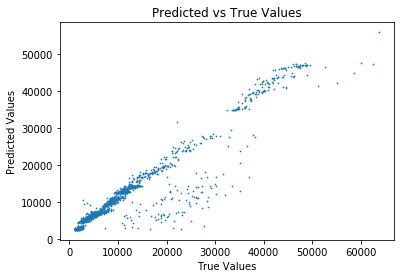

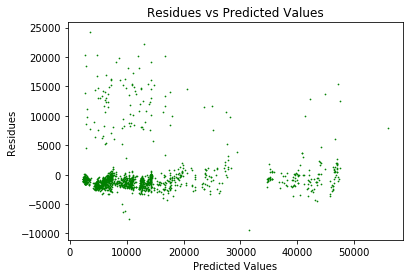

In [181]:
kf = KFold(n_splits=10)

train_rmse = 0.0
test_rmse = 0.0
n = 0

model_cv = clf.best_estimator_

for train, test in kf.split(X,y):
    print("Split: ", n)
    n += 1
    model_cv.fit(X[train],y[train])
    y_pred_train = model_cv.predict(X[train])
    y_pred_test = model_cv.predict(X[test])
    #RMSE Error
    train_rmse += (mean_squared_error(y[train],y_pred_train))
    test_rmse += (mean_squared_error(y[test],y_pred_test))

train_rmse = sqrt(train_rmse/10.0)
test_rmse = sqrt(test_rmse/10.0)
oob = 1 - model_cv.oob_score_

print("Average Train RMSE: ", train_rmse, "\nAverage Test RMSE: ", test_rmse)
print("Out of Bag Error: ", oob)
plot_graphs(model_cv,X,y)



In [182]:
y_predcited = model_cv.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

error 4049.6689875571624


In [79]:
x_ft1 = insurance_df_encooded[['ft1']].values
x_ft1_new = []
for x_value in x_ft1:
    if(x_value<30):
        x_ft1_new.append(1)
    elif(x_value>=30 and x_value<=50 ):
        x_ft1_new.append(2)
    elif( x_value>50 ):
        x_ft1_new.append(3)
        
x_ft2 = insurance_df_encooded[['ft2']].values
x_ft2_new = []
for x_value in x_ft2:
    if(x_value<25):
        x_ft2_new.append(1)
    elif(x_value>=25 and x_value<=35 ):
        x_ft2_new.append(2)
    elif( x_value>35 ):
        x_ft2_new.append(3)
        
x_ft3 = insurance_df_encooded[['ft3']].values

insurance_df = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\UCLA\\lsdm\\proj4\\insurance_data.csv")

le = preprocessing.LabelEncoder()
x_ft4 = insurance_df[['ft4']].values
x_ft4_ = x_ft4.reshape(len(x_ft4),1)
x_ft4_numeric=le.fit_transform(x_ft4)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft5 = insurance_df[['ft5']].values
x_ft5_ = x_ft5.reshape(len(x_ft5),1)
x_ft5_numeric=le.fit_transform(x_ft5)
print(le.classes_)

le = preprocessing.LabelEncoder()
x_ft6 = insurance_df[['ft6']].values
x_ft6_ = x_ft6.reshape(len(x_ft6),1)
x_ft6_numeric=le.fit_transform(x_ft6)
print(le.classes_)

X_all_numeric = np.vstack ((x_ft4_numeric,x_ft5_numeric))
X_all_numeric = np.vstack ((X_all_numeric,x_ft6_numeric)).T
X_all_numeric = np.hstack ((insurance_df[['ft1','ft2','ft3']].values,X_all_numeric))

scaler = StandardScaler()

X_new = scaler.fit_transform(X_all_numeric)


['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Split:  0
18429187.20573441
17272579.06113391
Split:  1
21971974.803092163
22449466.33351403
Split:  2
19004038.75207366
22837888.240292877
Split:  3
18508753.900240004
29815079.6950376
Split:  4
22161388.938855797
23496339.948846832
Split:  5
19890487.04887506
8831414.789929891
Split:  6
22240627.49757953
22007336.867649492
Split:  7
21018073.37401153
32732356.609410726
Split:  8
22386195.734233364
20718203.596755415
Split:  9
18253244.086046807
28768368.044298653
Average Train RMSE:  4515.129802572041 
Average Test RMSE:  4784.652894274249


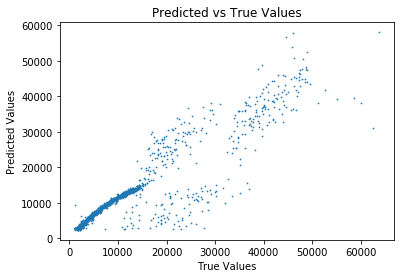

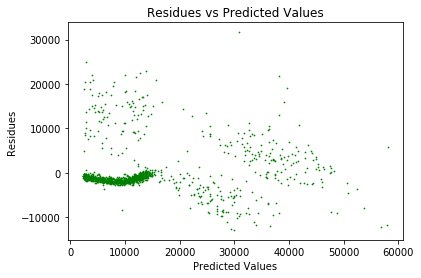

In [176]:
#Neural network

from sklearn.neural_network import MLPRegressor
model_cv = MLPRegressor( activation='relu',alpha=0.5,learning_rate ='adaptive',shuffle =True,solver ='lbfgs',
                    hidden_layer_sizes=( 10,4))
kf = KFold(n_splits=10)
#print("model.n_layers_ ",model.n_layers_ )
train_rmse = 0.0
test_rmse = 0.0
n = 0
model_cv.fit(X_new, y)                         
for train, test in kf.split(X_new,y):
    print("Split: ", n)
    n += 1
    model_cv.fit(X_new[train],y[train])
    y_pred_train = model_cv.predict(X_new[train])
    y_pred_test = model_cv.predict(X_new[test])
    print(mean_squared_error(y[train],y_pred_train))
    print(mean_squared_error(y[test],y_pred_test))
    #RMSE Error
    train_rmse += (mean_squared_error(y[train],y_pred_train))
    test_rmse += (mean_squared_error(y[test],y_pred_test))

train_rmse = sqrt(train_rmse/10.0)
test_rmse = sqrt(test_rmse/10.0)

print("Average Train RMSE: ", train_rmse, "\nAverage Test RMSE: ", test_rmse)
plot_graphs(model_cv,X,y)




In [89]:
y_predcited = model_cv.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

error 4967.686525858111


In [191]:
tuned_parameters =  {
    'alpha': np.linspace(0, 1, 5),
   'hidden_layer_sizes':[( 2,3),( 5,4),( 10,4)]
    }


clf = GridSearchCV(MLPRegressor(activation='relu',learning_rate ='adaptive',shuffle =True,solver ='lbfgs',
                   ),tuned_parameters,n_jobs=-1)
clf.fit(X, y)


print(clf.best_estimator_)

y_predcited = clf.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

C:\Users\vaish\Anaconda3\envs\proj3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


MLPRegressor(activation='relu', alpha=1.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 4), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
error 4836.217812520799


In [192]:
y_predcited = clf.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

error 4836.217812520799


Split:  0
Split:  1
Split:  2
Split:  3
Split:  4
Split:  5
Split:  6
Split:  7
Split:  8
Split:  9
Average Train RMSE:  7316.911118986268 
Average Test RMSE:  7337.986106748894


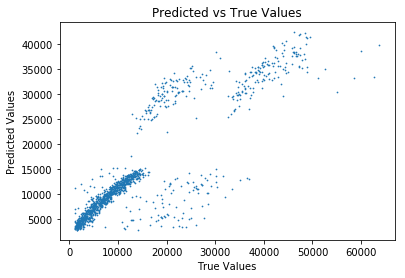

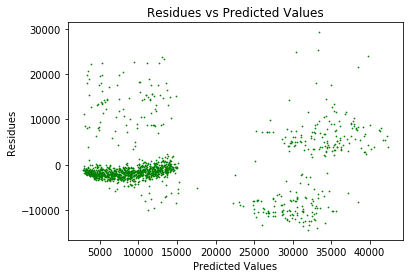

In [193]:
kf = KFold(n_splits=10)
#print("model.n_layers_ ",model.n_layers_ )
train_rmse = 0.0
test_rmse = 0.0
n = 0
model_cv = clf.best_estimator_
for train, test in kf.split(X,y):
    print("Split: ", n)
    n += 1
    model_cv.fit(X[train],y[train])
    y_pred_train = model_cv.predict(X[train])
    y_pred_test = model_cv.predict(X[test])
    #RMSE Error
    train_rmse += (mean_squared_error(y[train],y_pred_train))
    test_rmse += (mean_squared_error(y[test],y_pred_test))

train_rmse = sqrt(train_rmse/10.0)
test_rmse = sqrt(test_rmse/10.0)

print("Average Train RMSE: ", train_rmse, "\nAverage Test RMSE: ", test_rmse)
plot_graphs(model_cv,X,y)

Split:  0
Split:  1
Split:  2
Split:  3
Split:  4
Split:  5
Split:  6
Split:  7
Split:  8
Split:  9
Average Train RMSE:  4988.960342466365 
Average Test RMSE:  5196.584520491455


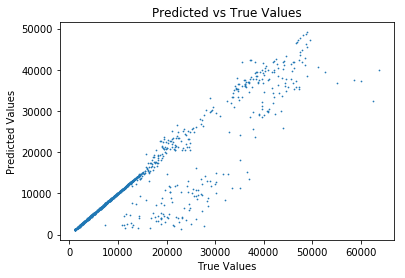

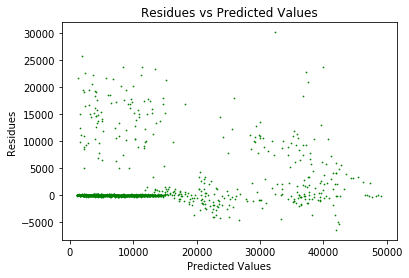

In [195]:
#gradient boosting tree

from sklearn.ensemble import GradientBoostingRegressor
alpha = 0.4
model_cv =  GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1)
kf = KFold(n_splits=10)
#print("model.n_layers_ ",model.n_layers_ )
train_rmse = 0.0
test_rmse = 0.0
n = 0
model_cv.fit(X, y)                         
for train, test in kf.split(X,y):
    print("Split: ", n)
    n += 1
    model_cv.fit(X[train],y[train])
    y_pred_train = model_cv.predict(X[train])
    y_pred_test = model_cv.predict(X[test])
    #RMSE Error
    train_rmse += (mean_squared_error(y[train],y_pred_train))
    test_rmse += (mean_squared_error(y[test],y_pred_test))

train_rmse = sqrt(train_rmse/10.0)
test_rmse = sqrt(test_rmse/10.0)

print("Average Train RMSE: ", train_rmse, "\nAverage Test RMSE: ", test_rmse)
plot_graphs(model_cv,X,y)

In [196]:
y_predcited = model_cv.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

error 4953.275564831214


In [68]:
tuned_parameters =  {

    'alpha': np.linspace(0.1, 0.99, 5),
     #'n_estimators':[200,250],
    'max_depth':[2,3,40],
    'learning_rate':np.linspace(1e-5, 1, 10)
    }


clf = GridSearchCV(GradientBoostingRegressor(),tuned_parameters,cv=10, n_jobs = -1)
clf.fit(X, y)


print(clf.best_estimator_)

GradientBoostingRegressor(alpha=0.3225, criterion='friedman_mse', init=None,
             learning_rate=0.11112, loss='ls', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


Split:  0
Split:  1
Split:  2
Split:  3
Split:  4
Split:  5
Split:  6
Split:  7
Split:  8
Split:  9
Average Train RMSE:  4150.542681759087 
Average Test RMSE:  4516.484436593981


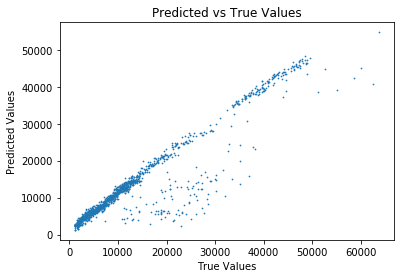

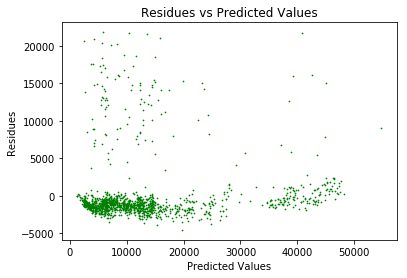

In [69]:
model_cv =  clf.best_estimator_
kf = KFold(n_splits=10)
#print("model.n_layers_ ",model.n_layers_ )
train_rmse = 0.0
test_rmse = 0.0
n = 0
model_cv.fit(X, y)                         
for train, test in kf.split(X,y):
    print("Split: ", n)
    n += 1
    model_cv.fit(X[train],y[train])
    y_pred_train = model_cv.predict(X[train])
    y_pred_test = model_cv.predict(X[test])
    #RMSE Error
    train_rmse += (mean_squared_error(y[train],y_pred_train))
    test_rmse += (mean_squared_error(y[test],y_pred_test))

train_rmse = sqrt(train_rmse/10.0)
test_rmse = sqrt(test_rmse/10.0)

print("Average Train RMSE: ", train_rmse, "\nAverage Test RMSE: ", test_rmse)
plot_graphs(model_cv,X,y)

In [70]:
y_predcited = model_cv.predict(X)
error = np.sqrt(np.sum((y_predcited - y)**2)/y.shape[0])
print("error",error)

error 4168.671094032882
